In [2]:
import numpy as np
import matplotlib.pyplot as plt

## Question 1

In [3]:
def Shift(array, dx):
    N = len(array)
    k = np.arange(N)
    ft = np.fft.fft(array)
    ft_new = ft*np.exp(-2j*np.pi*k*dx/N)
    new_array = np.fft.ifft(ft_new)
    return new_array

In [4]:
x = np.linspace(-10, 10, 100)
y = np.exp(-x**2/(2*1**2))
dx = len(y)/5
y_new = Shift(y, dx)

//anaconda3/lib/python3.7/site-packages/numpy/core/_asarray.py:102: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


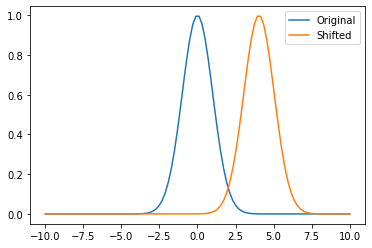

In [5]:
plt.plot(x, y, label = 'Original')
plt.plot(x, y_new, label = 'Shifted')
plt.legend()
plt.show()

## Question 2

In [6]:
def Corr(fun1, fun2):
    ft1 = np.fft.fft(fun1)
    ft2 = np.fft.fft(np.flip(fun2))
    return np.real(np.fft.ifft(ft1*ft2))

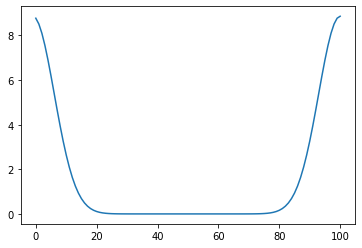

In [7]:
x = np.linspace(-10,10,101)
fun1 = np.exp(-x**2/(2))
corr = Corr(fun1, fun1)
plt.plot(corr)
plt.show()

## Question 3

In [8]:
def ShiftCorr(fun, dx):
    shift = Shift(fun, dx)
    corr = Corr(fun, shift)
    return corr

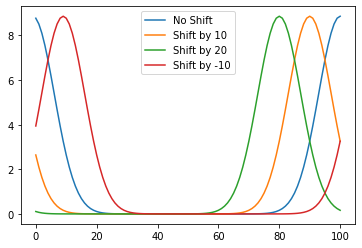

In [9]:
x = np.linspace(-10, 10, 101)
gauss = np.exp(-x**2/2)
shift0 = ShiftCorr(gauss, 0)
plt.plot(shift0, label = 'No Shift')
shift1 = ShiftCorr(gauss, 10)
plt.plot(shift1, label = 'Shift by 10')
shift2 = ShiftCorr(gauss, 20)
plt.plot(shift2, label = 'Shift by 20')
shift2 = ShiftCorr(gauss, -10)
plt.plot(shift2, label = 'Shift by -10')
plt.legend()
plt.show()

## Note: 
### Here we took the correlation of the original function with its shifted function and we observe shift in the OPPOSITE direction; however, if we took the correlation of the shifted with the original function (SWAP ORDER) then we will observe shift in the SAME direction.

## Question 4

In [10]:
def conv_safe(f,g):
    diff = abs(len(f)-len(g))
    n = len(f)
    if len(f) > len(g):
        g = np.concatenate((g,np.zeros(diff)))
        n = round(len(f))
    elif len(f) < len(g):
        f = np.concatenate((f,np.zeros(diff)))
        n = round(len(g))
    f = np.concatenate((f,np.zeros(n)))
    g = np.concatenate((g,np.zeros(n)))
    fft = np.fft.fft(f)
    gft = np.fft.fft(g)
    conv = np.real(np.fft.ifft(fft*gft))
    return conv

400


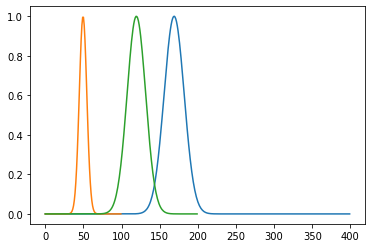

In [11]:
x = np.linspace(-10, 10, 100)
x2 = np.linspace(-10, 10, 200)
gauss = np.exp(-x**2/2)
gauss2 = np.exp(-(x2-2)**2/3)
#sin1 = np.sin(x)
#sin2 = np.sin(x2)
conv = conv_safe(gauss, gauss2)
print(len(conv))
plt.plot(conv/max(conv), label = 'Conv')
plt.plot(gauss, label = 'Function 1')
plt.plot(gauss2, label = 'Function 2')

Here we add first pad the smaller array with enough zeros so that the 2 arrays are the same size as we need for future operations. Then since we need both arrays to be zero padded, we add zeros equal to the size of the array to the arrays so that our output array is twice the size of the longest array passed in.

## Question 5

### a.) $\sum_{x=0}^{N-1} exp(-2\pi ikx/N) = \sum_{x=0}^{N-1} exp(-2\pi ik/N)^x$
<br>
Recall Geometric Series: $\sum_{k=0}^{n} ar^k = a(\frac{1-r^{n+1}}{1-r})$
<br>
$\sum_{x=0}^{N-1} exp(-2\pi ik/N)^x = \frac{1-exp(-2\pi ik/N)^{N-1+1}}{1-exp(-2\pi ik/N)} = 
\frac{1-exp(-2\pi ik)}{1-exp(-2\pi ik/N)}$

### b.)

Using l'hopital's rule: $\lim_{k\to 0}\frac{1-exp(-2\pi ik)}{1-exp(-2\pi ik/N)} = \lim_{k\to 0}\frac{2\pi iexp(-2\pi ik)}{2\pi i/N exp(-2\pi ik/N)} = N$
<br>
$1-exp(2\pi ik) = 0, k\in \mathbb{Z}$ 
<br>
Therefore, if k is not a multiple of N, $1-exp(-2\pi ik/N)\neq0$
<br>
Hence, $\frac{1-exp(-2\pi ik)}{1-exp(-2\pi ik/N)} = 0$ if k is an integer, but not a multiple of N.

### c.)

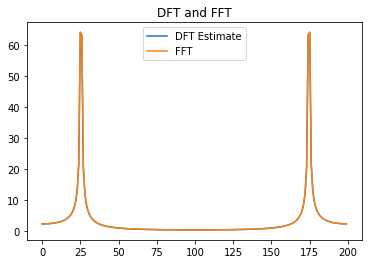

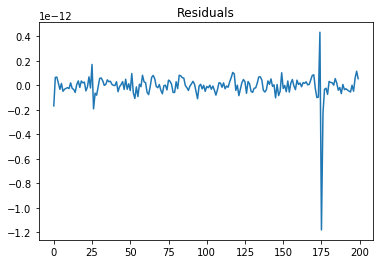

In [12]:
k2 = np.arange(200)
k = 51/2
N = len(k2)
def dft_sin(k, k2):
    N = len(k2)
    num_1 = 1-np.exp(2j*np.pi*(k-k2))
    bot_1 = 1-np.exp(2j*np.pi*(k-k2)/N)
    num_2 = 1-np.exp(-2j*np.pi*(k+k2))
    bot_2 = 1-np.exp(-2j*np.pi*(k+k2)/N)
    return np.real(1/(2j)*((num_1/bot_1)-(num_2/bot_2)))
dft = dft_sin(k=k, k2=k2)
plt.plot(abs(dft), label = 'DFT Estimate')
fft = np.fft.fft(np.sin(2*np.pi*k*k2/N))
plt.plot(abs(fft), label = 'FFT')
plt.title('DFT and FFT')
plt.legend()
plt.show()
plt.plot(abs(fft)-abs(dft))
plt.title('Residuals')
plt.show()

By plotting the residuals between the our analytic estimate of the DFT and FFT, we see that we have errors on the order of magnitude of -12. We plot our DFT and observe that the curve looks like a wide delta function.

### d.)

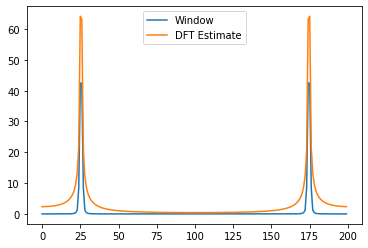

In [13]:
k2 = np.arange(200)
k = 51/2
N = len(k2)
window = 0.5 - 0.5*np.cos(2*np.pi*k2/N)
fft = np.fft.fft(window*np.sin(2*np.pi*k*k2/N))
plt.plot(abs(fft), label = 'Window')
plt.plot(abs(dft), label = 'DFT Estimate')
plt.legend()

### e.)

[10. -5.  0.  0.  0.  0.  0. -0.  0.  0.  0.  0.  0.  0.  0.  0.  0. -0.
  0. -5.]


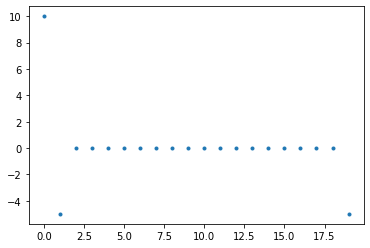

In [14]:
k2 = np.arange(20)
N = len(k2)
window = 0.5 - 0.5*np.cos(2*np.pi*k2/N)
winfft = np.fft.fft(window)
plt.plot(np.real(winfft), '.')
print(np.round(np.real(winfft)))

Since we have N = 20, we expect the first, second and last elements of the array to have values of 20/2, -20/4, -20/4 respectively, which we observe in the plot/print statement.
<br>
For this next part, we know that the Fourier Transform (FT) of the window tells us how to sample points in order to apply the window in Fourier Space. So our windowed sin function is simply:
<br>
$F(N) = -\frac{F(N-1)}{4} + \frac{F(N)}{2} -\frac{F(N+1)}{4}$ where $F(N)$ is the FT of our function.

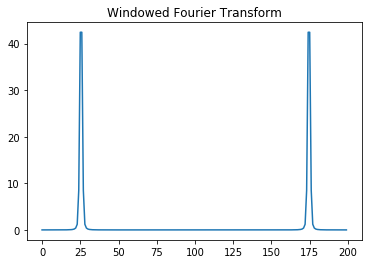

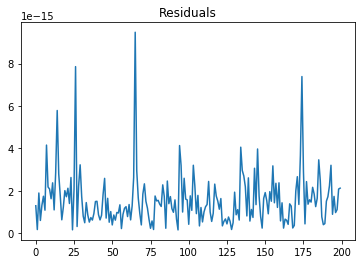

In [16]:
x = np.arange(200)
k = 51/2
N = len(x)


rfft = np.fft.fft(np.sin(2*np.pi*k*x/N))
windowed = -np.roll(rfft, -1)/4 + rfft/2 - np.roll(rfft, 1)/4
plt.plot(np.abs(windowed))
plt.title('Windowed Fourier Transform')
plt.show()


window = 0.5 - 0.5*np.cos(2*np.pi*x/N)
fft = np.fft.fft(window*np.sin(2*np.pi*k*x/N))
plt.plot(np.abs(windowed - fft))
plt.title('Residuals')
plt.show()

## Question 6.)

### a.)

### b.)

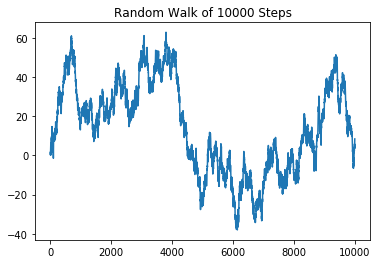

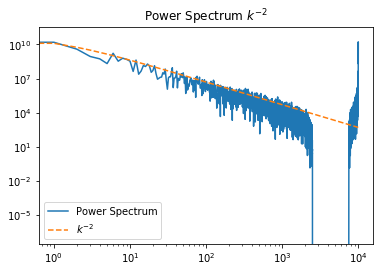

In [17]:
n = 10000
walk = np.cumsum(np.random.randn(n)) 
plt.plot(walk)
plt.title('Random Walk of 10000 Steps')
plt.show()
N = np.arange(n, dtype = float)[1:]**-2 # Take [1:] to bypass divide by zero
corr = Corr(walk, walk)
plt.loglog(np.fft.fft(corr), label = 'Power Spectrum')
plt.loglog(N*10e10/2, '--', label = r'$k^{-2}$') # 10e10/2 is arbitrary coefficient to show scaling
plt.title('Power Spectrum $k^{-2}$')
plt.legend()
plt.show()